In [1]:
# import tensorflow
import tensorflow as tf
# To plot the image
import matplotlib.pyplot as plt
# to handle the  data structure
import numpy as np

In [2]:
# Download the MNIST dataset
mnist = tf.keras.datasets.mnist

# Splitting it into training and testing population
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


Training samples: (60000, 28, 28)
training labels: (60000,)


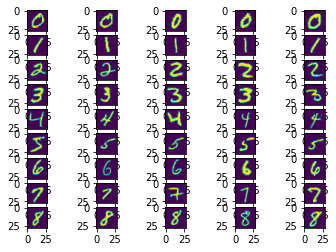

In [3]:
# visualize the dataset
print('Training samples:',x_train.shape)
print('training labels:',y_train.shape)

fig, axarr = plt.subplots(9,5)
for i in range(9):
  for j,k in enumerate(np.where(y_train==i)[0][0:5]):
    axarr[i,j].imshow(x_train[k])
plt.show()

In [4]:
# Create a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), #"linear", "relu","sigmoid","tanh"
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,tf.keras.layers.Softmax())
])

# visualize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 1.5819 - accuracy: 0.8959
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5237 - accuracy: 0.9434
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5099 - accuracy: 0.9553
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5024 - accuracy: 0.9623
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4975 - accuracy: 0.9662


In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4952 - accuracy: 0.9683


[1.4952020645141602, 0.9682999849319458]

In [9]:
predictions=model.predict(x_test)
for i,p in enumerate(predictions):
  print("Actual label:",y_test[i],"Predicted Label:",np.where(p==np.max(p))[0][0],"Probability",np.max(p))

Streaming output truncated to the last 5000 lines.
Actual label: 3 Predicted Label: 3 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 0.9944376
Actual label: 9 Predicted Label: 9 Probability 1.0
Actual label: 8 Predicted Label: 8 Probability 1.0
Actual label: 4 Predicted Label: 4 Probability 1.0
Actual label: 1 Predicted Label: 1 Probability 0.9999982
Actual label: 0 Predicted Label: 0 Probability 0.9999908
Actual label: 6 Predicted Label: 6 Probability 0.9999999
Actual label: 0 Predicted Label: 0 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 0.99998546
Actual label: 6 Predicted Label: 6 Probability 1.0
Actual label: 8 Predicted Label: 8 Probability 0.9992003
Actual label: 6 Predicted Label: 6 Probability 1.0
Actual label: 1 Predicted Label: 1 Probability 1.0
Actual label: 1 Predicted Label: 1 Probability 0.99999785
Actual label: 9 Predicted Label: 9 Probability 0.9999356
Actual label: 8 Predicted Label: 8 Probability 1.0
Actual label: 9 Predicted Label: